# Using Perceptron for Classification

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [2]:
print(X)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [3]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [5]:
#Splitting the data in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
#train_test_split() function already shuffles the training datasets internally before splitting
#random_state is used internally for random shuffling before splitting the dataset
#stratify in this case ensures that the train and test dataset have same proportion of class labels as the input dataset

In [6]:
print('Labels counts in y', np.bincount(y))

Labels counts in y [50 50 50]


In [7]:
print('Lables counts in y_train', np.bincount(y_train))

Lables counts in y_train [35 35 35]


In [8]:
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y_test [15 15 15]


### Scaling the features using standard scaler


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [10]:
sc.fit(X_train)#Using the fit method the StandardScaler estimates the parameters mean and standard deviation for each feature dimension from training data

StandardScaler()

In [11]:
X_train_std = sc.transform(X_train)#standardizing the training data

In [12]:
print(X_train_std)

[[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.0097479   1.57698181]
 [ 1.56747294  1.18367281]
 [-1.44424226 -1.30728421]
 [ 1.12129291  0.5281578 ]
 [ 0.45202286  0.1348488 ]
 [-0.27301968 -0.2584602 ]
 [ 0.06161534  0.2659518 ]
 [-1.38846976 -1.30728421]
 [ 0.50779537  0.0037458 ]
 [ 0.11738784  0.1348488 ]
 [ 0.73088538  0.92146681]
 [-1.05383474 -1.30728421]
 [-0.16147468 -0.2584602 ]
 [ 0.06161534  0.0037458 ]
 [-1.22115225 -1.30728421]
 [ 0.56356787  0.79036381]
 [ 1.73479045  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.39625036  0.1348488 ]
 [ 0.00584283 -0.1273572 ]
 [ 1.0097479   1.57698181]
 [ 0.50779537  0.2659518 ]
 [ 1.0097479   0.2659518 ]
 [ 1.12129291  1.31477581]
 [ 0.73088538  1.57698181]
 [ 0.17316034  0.1348488 ]
 [-1.27692475 -1.04507821]
 [ 1.62324544  1.31477581]
 [ 0.67511288  0.92146681]
 [ 0.56356787  0.79036381]
 [ 1.0097479   1.18367281]
 [ 0.22893285  0.3970548 ]
 

In [13]:
X_test_std = sc.transform(X_test)#same mean and standard deviation are used for test datasets also to keep it comaprable

In [14]:
print(X_test_std)

[[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]
 [ 0.11738784  0.1348488 ]
 [ 1.12129291  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.84243039  0.92146681]
 [-1.38846976 -1.04507821]
 [-1.27692475 -1.04507821]
 [ 0.61934037  0.79036381]
 [-1.33269725 -1.30728421]
 [-0.27301968 -0.2584602 ]
 [-1.33269725 -1.30728421]
 [ 0.56356787  0.2659518 ]
 [ 0.73088538  1.44587881]
 [ 0.39625036  0.3970548 ]
 [ 0.28470535  0.1348488 ]
 [ 0.78665788  1.05256981]
 [ 1.17706541  1.18367281]
 [-1.33269725 -1.43838721]
 [ 0.34047786  0.2659518 ]
 [ 0.61934037  1.05256981]
 [ 0.22893285  0.1348488 ]
 [ 0.50779537  0.5281578 ]
 [-0.4403372  -0.1273572 ]
 [ 1.0655204   1.70808482]
 [-1.22115225 -0.78287221]
 [ 0.67511288  1.05256981]
 [-1.22115225 -1.30728421]
 [-1.33269725 -1.30728421]
 [ 0.11738784 -0.2584602 ]
 [ 0.11738784  0.1348488 ]
 [ 1.40015543  0.79036381]
 [ 0.9539754   1.18367281]
 [-1.33269725 -1.43838721]
 

### Applying the perceptron

In [15]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)#fitting the train dataset i.e. training part

Perceptron(eta0=0.1, random_state=1)

In [16]:
print(ppn)

Perceptron(eta0=0.1, random_state=1)


In [17]:
#Now prediction
y_pred = ppn.predict(X_test_std)

In [18]:
print(y_pred)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [19]:
print('Misclassified example: %d' % (y_test != y_pred).sum())

Misclassified example: 1


In [20]:
#evaluation metrics
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [21]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [31]:
#plotting the decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue','lightgreen', 'gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision suface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,0].min() - 1, X[:,0].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class examples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1, 0],
                    y=X[y==c1, 1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label=f'Class{c1}',
                   edgecolor='black')
    #highest test examples
    if test_idx:
        #plot all examples
        X_test, y_test, = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100,
                   label="Test set")

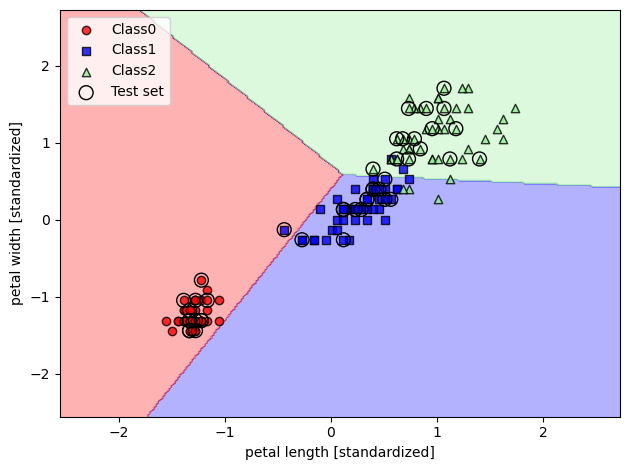

In [32]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Linear perceptron classifier.
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  l1_ratio : float, default=0.15
 |      The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
 |      `l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.
 |      Only used if 

# Using Logistic Regression 

Q) Why using Logistic Regression when already Perceptron is there for Classification?
A) Because, Perceptron can only CONVERGE for linearly separable data. So, for non-linearly separable data we will look at more powerful linear classifiers that converge to a loss 


Multinomial Logistic Regression or Softmax Regression

OvR techniques

Paste the Picture of Derivation of the Logistic Regression equation here

In [34]:
#plotting the sigmoid function
import matplotlib.pyplot as plt
import numpy as np

In [35]:
#defining sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [36]:
z = np.arange(-7, 7, 0.1)
print(z)

[-7.00000000e+00 -6.90000000e+00 -6.80000000e+00 -6.70000000e+00
 -6.60000000e+00 -6.50000000e+00 -6.40000000e+00 -6.30000000e+00
 -6.20000000e+00 -6.10000000e+00 -6.00000000e+00 -5.90000000e+00
 -5.80000000e+00 -5.70000000e+00 -5.60000000e+00 -5.50000000e+00
 -5.40000000e+00 -5.30000000e+00 -5.20000000e+00 -5.10000000e+00
 -5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000

In [37]:
sigma_z = sigmoid(z)

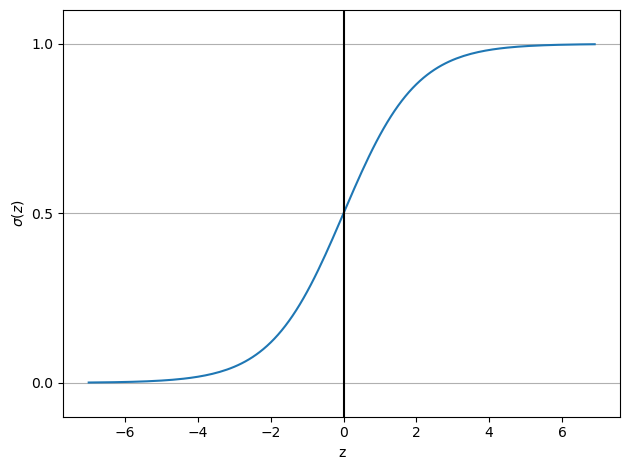

In [38]:
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
#y axis tick and gridlines
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

A short code snippet to create a plot that illustrates the loss of classifying a single training example for different values of sigmoid(z)

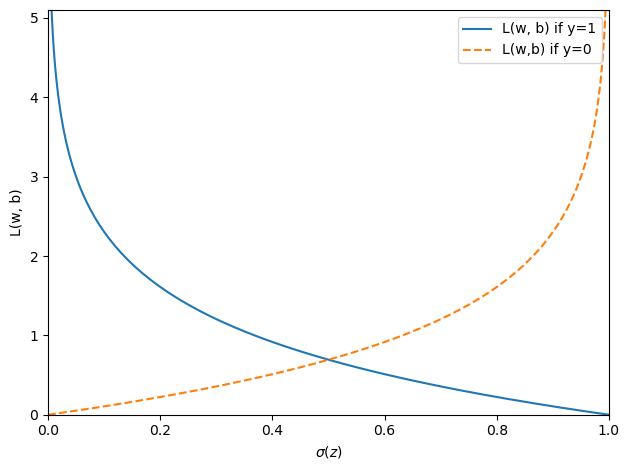

In [39]:
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1= [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w,b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel("$\sigma(z)$")
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [40]:
z = np.arange(-10, 10, 0.1)
print(z)

[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000